In [41]:
import findspark
findspark.init()

import sys
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import Row
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.mllib.clustering import StreamingKMeans
from pyspark.streaming import StreamingContext
from pyspark.mllib.linalg import Vectors
from pyspark.mllib.regression import LabeledPoint
from operator import itemgetter

In [ ]:
sc = SparkContext("local[2]", "Anomalies_detection")
sqlContext = SQLContext(sc)
ssc = StreamingContext(sc, 2)  # 1 second per batch

# ssc = StreamingContext(sc, 1)

In [ ]:
def readData(filename):
    rawDF = sqlContext.read.csv(filename, inferSchema=True, header=True)
    return rawDF
    
file_path = "/home/drogon/Desktop/FYP/iris.csv"
df = readData(file_path)
df.show(n=7, truncate=99)

In [ ]:
numeric_cols = ['sepal-l','sepal-w','petal-l','petal-w']
labelIndexer = StringIndexer(inputCol='class', outputCol='label', handleInvalid = 'keep')
df = labelIndexer.fit(df).transform(df)
df.show(n=100)

In [ ]:
# assembler = VectorAssembler(inputCols = ['label'] + numeric_cols , outputCol= 'features')
df = df.drop('class')

In [ ]:
df.show(n=7)

In [ ]:
max_value = df.agg({"label": "max"}).collect()[0][0]
min_value = df.agg({"label": "min"}).collect()[0][0]
print max_value, min_value

In [ ]:
# train, test = df.randomSplit([0.7, 0.3])

In [ ]:
features = df.rdd.map(lambda row: Vectors.dense(row[0]))
# training_features = train.rdd.map(lambda row: Vectors.dense(row[0]))
# testing_features = test.rdd.map(lambda row: Vectors.dense(row[0]))

In [ ]:
Queue = [features]
# trainingQueue = [training_features]
# testingQueue = [testing_features]

In [ ]:
Stream = ssc.queueStream(Queue,oneAtATime=True)
# trainingStream = ssc.queueStream(trainingQueue,oneAtATime=True)
# testingStream = ssc.queueStream(testingQueue)

In [ ]:
Stream.pprint()
# trainingStream.pprint()

In [ ]:
ssc.start()  # start streaming

In [ ]:
ssc.stop(stopSparkContext=True, stopGraceFully=True)

In [2]:
3+2*2

7

In [11]:
a = '1234567'
a[1::2]

'246'

In [17]:
V = {'A','B','C'}
V.add('D')

In [18]:
V

{'A', 'B', 'C', 'D'}

In [19]:
A=((11,12),[21,22])

In [23]:
A[1]

[21, 22]

In [24]:
n = 'Ahsan'

In [31]:
n.find('A')

0

In [32]:
lambi = """PROBATTLE’18 - The last

Guys, you have gotten a very lazy DG here so I am sorry for being this late but a thank you to all you beautiful people was due and I keep my promises 😉

Ever since I got into IBA I have been a part of numerous events but you see, only a few events are so special that they occupy a space in your heart forever. A part of me regrets not working for Probattle in my freshmen and sophomore years but on the bright side, I couldn’t be more thankful and glad to be a part of the previous two editions. Probattle has given me a family that I will cherish forever. <3

First and foremost, Asad Raza Tejani, my manager, THANK YOU! <3 Not only for giving me the opportunity (read forcing me) to take up this position but also for making this friend of yours super dooper proud! I remember how reluctant you were when you were being convinced to be the manager. I just hope I have fulfilled my promise well. Dude, you have remained so calm and phenomenal throughout. You had a constant smile on your face even when times were rough. There were times when I used to look at you and just admire the way you worked restlessly. <3 Also, I am sorry for losing my calm so many times and thank you for handling it so perfectly every time! :p

Rehan Ahmed (I hope I am tagging the right person) aka KAT! What do I say yaarr? You were seriously all over the place! You not only fulfilled your CFO duties flawlessly but also made sure every single department was up and running! I loved how proactive you were. You never waited for anybody else to do the work. From editing proposal, MOUs, bringing techjuice on board, being the first one to show up on event days and last one to leave, making sure the breakouts are tidy enough, running around the campus ALL DAY! You deserve much more than just a kitkat. PB’19 is in good hands 😉

Azka Farooqui, my silent worker! You saved us when nobody else could. From dealing with the faculty, being there for the marketing department when I fell asleep xD, handling all the official emails, the room allocations and to compiling all the results and handling the closing ceremony so well. We couldn’t have had a better Assistant Manager! <3

Daddy Probattle, Ali Jawwad AJ! I can’t thank you enough for welcoming me and introducing me to the Probattle family last year! Thank you for trusting me with it. We have had our ups and downs too but it was all worth it. :p I think we all know, we couldn’t have pulled off PB’18 without you. You really worried like a dad and kept the entire hierarchy well-knit. :D Pictures kaafi achi aayi hain aapki wesy 😉

DG, Hanzallah Bin Ashaar. Trust me when I say this, I don’t have the right words to thank you for what you have done in the past couple of months. I couldn’t have asked for a better friend and support. Thank you for listening to my rants literally all day every dayyyy (ye constant rahega :p), for motivating me, for making sure I don’t lose hope, for pushing me to do better, for always advising me at every step, for helping me calm down, for all the pep talks (specifically for that talk at Tabba) and helping me step out of my comfort zone! Could not have done this without you. Wasn’t as good as you were but I hope your successor didn’t disappoint you. :p

The hierarchy.

Saqlain Raza, cutest chairman yaarr! The positivity you used to bring along kept us all going! :D
Abaq Asif, President! I am so glad I got to know you through this PB! <3 Your efforts were evident and they need no appreciation. <3
Tatheer Fatima, our bond got even stronger this year! Love youuu. <3 Please don’t graduate this soon ☹

Hasan Ali, Mohammad Tariq Aijaz, Mursal Khan, Khizar Lakhani. You guys know it all yaar. I don’t think I have the right words or I am in the position to appreciate your efforts. I am just glad I got to work with such amazing people who also happen to be good friends of mine! Tariq bohat khuwaari ki hai tumne printing kiii. Hasan thanks for handling the creatives so well. Mursal, you made the installations look so damn easy! :D Khizar, amazing at what you do! On day operations were very smooth! :D

EXECUTIVE COUNCIL aka Dean’s list :p
Who knew that dean’s listers could pull off such an amazing event? Muhammad Maaz Tariq, Sauleh, Maaz, Shehreyar Ahmed Kohati, Uzair, Hassan Saeed! You guys were the backbone of Probattle’18. :D You fulfilled you duties remarkably and the events you guys headed were impeccable! :D

HOST TEAM.

Would like to start from the departments that I was responsible for. Program Design, Social media Marketing and Brand Ambassadors. You guys have made me so so proud!! <3

Sona Virwani, meri haseen ED PD! <3 Be it before the event or on event days, be it 9 in the morning or 2 at night, you worked with a smile on your face! I loved how you coordinated with the communications and registrations. Once you have been assigned a duty, you do it with so much perfection. Kabhi remind tak karwane ki zarurat nai parti thi. You left no loop holes. The PD was immaculate! Thank you so much jaan(i)! 😉 Love ho. <3

Mukarram Ali Khan, yun tau PD main koi kamaal nai dikhaya :p lekin event day jo kia hai na tumne! I remember how I came to you and said ‘Please izzat rakhlena aaj meri’. Thank you so much, mukku!!!! <3

Aisha Saleem, I know I had forced you to work for this department but I am so thankful to you for handling it SO WELL! I know how difficult this department is and I have bugged you A LOT! Marketing requires a lot of time and effort. It also asks for a lot of sacrifices like loads of mobile data xD and you did it all without any complaints! You were the best person for this job! <3 Also, Maaz Sid nai karungi mention tau naraaz hojaogay :p Bohat daant khaai hai, bohat tang kia hai but in the end saara kaam kia hai tumne! Thank you! :D The two ADS, Sadiq and Hassaan, bohat khuwari ka kaam dia tha tum logon ko maine but you guys did it very well!

Brand Amabassadors.
Anas Farrukh, one man army. From day one I knew I could trust you with this job. I have seen you running back and forth from the gate, collecting money from BAs and participants and distributing food to the guest. You have worked regardless of your department and amazed me with your dedication towards PB! :D

If I were to give a best department award, it would have been registrations for sure!
Saadia Rasheed!! My bitching partner aka chota faraz!! It was one of the most crucial departments and I am sure Faraz Siddiqui is really proud of you and how you handled registrations and all the mishaps that came along 😉 Laiqa, Palvasha, Mariam, Sahar Akbar, Talat, Asna. Thank you so much for being super active before and during event days! <3

Rameen Shahzad, Asra Ayman, Areej Khalid, Fatima Qaudri, I have seen you guys working like crazy and I have been really annoying, always asking you guys to put more and more effort and I am so thankful to you guys for never saying no to me. Thank you for bringing United on board, Rameen. Asra, despite having solid reasons, you and Areej ran around the campus receiving and accompanying guests, serving them tea and food and making sure they leave with a smile on their faces. <3 Also Muhammad Ahmed and Shahroz Ahmed Khan, you guys were great on-day! :D

Publications. Muhammad Saad, thank you for helping with the proposals and captions! Part of me wanted you to write this post of mine as well :D

Faiza Tariq, tumhaare kaam se ziada tumhaare savage comments ki fan hogai hun main! :p Bori banwani hai? :p Haha, I know how cumbersome your job was. I know how irritating the participants queries get at times. You had to face it all and you and your team members were superb at it! <3 Also, thank you for the Probattle insiders! 😉

Ops, logistics and security. Didn’t get to interact much with you guys partly because you guys were always on your toes making sure the on-day operations were smooth! Taha Furqan, Khurram Khalid Iqbal, Hasan Asim, Hunain Khalid, Ali Syed Ali Masood Taqvi, Mustafa Sorathia, Mohsin Devjani, Waasif Rashid and specially my boys that I can ALWAYS COUNT ON! Ahmed Raja, Jari, Syed Omar Ahmed, Sikandar Ashraf! Thank you! :D

Lastly, creatives. Muhammad Arsalan, Muhammed Raza Vakil. Humesha se bohat phadde huwe hain is department se mere but thank you boys for working day and night for PB! Raza, bohat gaaliyan dien hain tumhain maine, sorry. :p

EVENT HEADS

I wasn’t dealing with the event heads but I would really like to appreciate few people.
Amara Jamal Ibtihaj Uddin!! PARTNERS!! <3 Best event okay? Okay. I loved how well organized your event was and the most fun too! Thank you Faraz, Asad Ullah Hashmi Osama Ibrahim and Hanzallah chaar chaand lagane k liye xD

Maryam Ahmed Baloch and Salman. The circumstances weren’t very well for you guys and I am sorry for that but you guys were superb and handled things perfectly! :D

Tanzeela Yousuf, I contacted you at the very last moment. Thank you for hosting the opening and closing ceremony so well! There were no blunders unlike last year xD

To all the MT members, I can't name you all but thank you for
all your efforts. :D

To the seniors and graduates who visited, Moiz Hasan Khan and Rehan Ahmed thank you for coming and boosting our morale.:D

Last but not the least, thank you Sir Shabbir Mukhi, Sir Farhan Ahmed Siddiqui, Sir Imran Rauf, Sir Ayaz Ahmad and Sir Asad Ali for gracing us with your presence.

It has been a wonderful ride y'all and you guys made it worthwhile. In a nutshell, it was great to get to know you and working along like a family. You all are extremely hardworking and talented individuals. Take PB to new heights next year <3 and mujhe zarur bulana :p

P.S. I hope I haven’t forgotten anybody, if I have kindly pardon my memory.

Signing off ( with a very heavy heart from my last event in IBA)
Director General
Jaweria Khan"""

In [46]:
wordcount={}
count = 0

for word in lambi.split():
    count +=1
    if word not in wordcount:
        wordcount[word] = 1
    else:
        wordcount[word] += 1
print count ,"words ki lambi"
sortedWords = sorted(wordcount.items(), key=itemgetter(1), reverse = True)
sortedWords

1804 words ki lambi


[('you', 64),
 ('and', 61),
 ('I', 58),
 ('the', 50),
 ('for', 39),
 ('to', 34),
 ('a', 22),
 ('have', 21),
 ('so', 18),
 ('were', 18),
 ('all', 17),
 ('<3', 17),
 ('You', 16),
 ('of', 16),
 ('but', 15),
 ('me', 14),
 ('guys', 14),
 ('your', 14),
 ('with', 14),
 (':D', 13),
 ('it', 13),
 ('this', 12),
 ('my', 11),
 ('thank', 10),
 (':p', 10),
 ('Thank', 10),
 ('am', 10),
 ('how', 9),
 ('event', 9),
 ('on', 9),
 ('Ahmed', 8),
 ('that', 8),
 ('in', 8),
 ('was', 8),
 ('at', 8),
 ('know', 7),
 ('department', 7),
 ('very', 6),
 ('\xf0\x9f\x98\x89', 6),
 ('sure', 6),
 ('The', 6),
 ('last', 6),
 ('like', 6),
 ('when', 6),
 ('making', 5),
 ('Ali', 5),
 ('one', 5),
 ('been', 5),
 ('much', 5),
 ('handling', 5),
 ('being', 5),
 ('had', 5),
 ('day', 5),
 ('be', 5),
 ('Sir', 5),
 ('bohat', 5),
 ('every', 4),
 ('from', 4),
 ('working', 4),
 ('more', 4),
 ('Muhammad', 4),
 ('not', 4),
 ('got', 4),
 ('Hasan', 4),
 ('really', 4),
 ('don\xe2\x80\x99t', 4),
 ('also', 4),
 ('hope', 4),
 ('do', 4),
 ('is',

In [48]:
from wordcloud import WordCloud 
words = wordcount
wc = WordCloud()
wcloud = wc.generate_from_frequencies(list(words.items()))

import matplotlib.pyplot as plt
plt.imshow(wcloud)
plt.axis("off")
plt.figure()
plt.imshow(wcloud)
plt.axis("off")
plt.show()

KeyError: 0

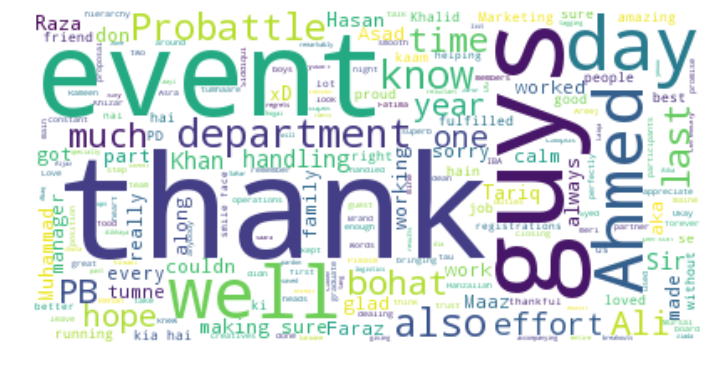

In [89]:
from wordcloud import WordCloud, STOPWORDS
import pylab as p
wordcloud = WordCloud(background_color="white").generate(lambi)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(lambi)
plt.figure(figsize=(12.0, 8.0))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
p.savefig('jaw.png')
plt.show()